<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Dominic B

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

F = $0$ fives, $28 \times 4 = 112$ possible rolls <br/>
S = $10$ fives, $10 \times 6 = 60$ possible rolls <br/>
T = $2$ fives, $2 \times 20 = 40$ possible rolls

$12$ fives $\div 212$ possible rolls = $0.0566$

$R_5 = 0.0566$

**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

The probabiliity that a Six-sided die is chosen given you roll a five is represented by, <br \>
$P(S \mid R_5) = \frac {P(S \bigcap R_5)}{P(R_5)}$ <br \>
$P(S \mid R_5) = \frac {10/212}{12/212} = \frac {5}{6} = 0.8333$

**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

$R_5$ and $S$ are not independent. $S$ is dependent on the event $R_5$ happening. <br \>

Events $R_5$ and $S$ are independent if and only if:
1. $P(R_5 \mid S) = P(R_5)$ <br \>
   $0.1667 \neq 0.0566$
2. $P(S \mid R_5) = P(S)$ <br \>
   $0.8333 \neq 0.25$
3. $P(R_5 \bigcap S) = P(R_5)P(S)$ <br \>
   $0.0472 \neq 0.0118$


**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

$P(F \mid E_1) = \frac {P(F \bigcap E_1)}{P(E_1)}$ <br \>
$P(F \mid E_1) = \frac {\frac {112}{212}}{\frac {160}{212}} = \frac {7}{10} = 0.7$ <br \>

The probability that you grabbed a Four-sided die in this scenario is $0.7$.

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

$P(F \mid E_n) = \frac {P(F \bigcap E_n)}{P(E_n)-n}$

In [2]:
def prob_four(n):
    return ((112)/212)/((161-n)/212)

In [3]:
print(prob_four(1))

0.7


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [4]:
print(prob_four(44))

0.9572649572649572


It would take $44$ successive rolls to make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided.

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

There are $13$ possible paths with two stops starting from $E$: <br \>
$E$ - $G$ - $R$ <br \>
$E$ - $G$ - $H$ <br \> 
$E$ - $G$ - $L$ <br \>
$E$ - $C$ - $L$ <br \>
$E$ - $C$ - $H$ <br \>
$E$ - $R$ - $G$ <br \>
$E$ - $L$ - $C$ <br \>
$E$ - $L$ - $H$ <br \>
$E$ - $L$ - $G$ <br \>
$E$ - $L$ - $E$ <br \>
$E$ - $G$ - $E$ <br \>
$E$ - $C$ - $E$ <br \>
$E$ - $R$ - $E$ <br \>

Therer are $2$ possible paths from $E$ to $L$ in two moves: <br \>
$E$ - $G$ - $L$ <br \>
$E$ - $C$ - $L$ <br \>

The probability that Oscar ends up at the $L$ after first visiting one other location, after he is initially at the $E$ is $\frac {2}{13} = \sim 0.1538$.




**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)



There are $8$ possible paths with two moves starting from $R$: <br \>
$R$ - $E$ - $G$ <br \> 
$R$ - $E$ - $L$ <br \>
$R$ - $E$ - $C$ <br \>
$R$ - $G$ - $E$ <br \> 
$R$ - $G$ - $L$ <br \>
$R$ - $G$ - $H$ <br \>
$R$ - $G$ - $R$ <br \>
$R$ - $E$ - $R$ <br \>

Therer are $5$ possible paths from $R$ that include a first_or_second stop at $G$: <br \>
$R$ - $G$ - $E$ <br \> 
$R$ - $G$ - $L$ <br \>
$R$ - $G$ - $H$ <br \>
$R$ - $E$ - $G$ <br \> 
$R$ - $G$ - $R$ <br \>

The probability that Stella ends up at the $G$ either as her first _or_ second location visited after leaving the $R$ is $\frac {5}{8} = 0.625$.

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**1.**

Oscar starts from $E$ while Stella starts from $H$. <br \>

There are $4$ possible places Oscar could go directly from $E$. <br \>
$E$ - $R$ <br \>
$E$ - $G$ <br \>
$E$ - $L$ <br \>
$E$ - $C$ <br \>

There are $3$ possible places Stella could go directly from $H$. <br \>
$H$ - $G$ <br \>
$H$ - $L$ <br \>
$H$ - $C$ <br \>

The total number of possible combinations of locations Oscar and Stella could end up at is $4 \times 3 = 12$. <br \>
There are $3$ possible combinations that end with Oscar and Stella at the same location. <br \>
$E$ - $G$, $H$ - $G$ <br \>
$E$ - $L$, $H$ - $L$ <br \>
$E$ - $C$, $H$ - $C$ <br \>

The probability that they run into each other in the same location on the first location visited is $\frac {3}{12} = \frac {1}{4} = 0.25$.


**2.**

There are $13$ possible places Oscar could go two moves from $E$. <br \>
$E$ - $G$ - $R$ <br \>
$E$ - $G$ - $H$ <br \> 
$E$ - $G$ - $L$ <br \>
$E$ - $C$ - $L$ <br \>
$E$ - $C$ - $H$ <br \>
$E$ - $R$ - $G$ <br \>
$E$ - $L$ - $C$ <br \>
$E$ - $L$ - $H$ <br \>
$E$ - $L$ - $G$ <br \>
$E$ - $L$ - $E$ <br \>
$E$ - $G$ - $E$ <br \>
$E$ - $C$ - $E$ <br \>
$E$ - $R$ - $E$ <br \>

There are $11$ possible places Stella could go two moves from $H$. <br \>
$H$ - $G$ - $R$ <br \>
$H$ - $G$ - $E$ <br \>
$H$ - $G$ - $L$ <br \>
$H$ - $L$ - $G$ <br \>
$H$ - $L$ - $E$ <br \>
$H$ - $L$ - $C$ <br \>
$H$ - $C$ - $L$ <br \>
$H$ - $C$ - $E$ <br \>
$H$ - $C$ - $H$ <br \>
$H$ - $L$ - $H$ <br \>
$H$ - $G$ - $H$ <br \>

The total number of possible combinations of locations Oscar and Stella could end up at is $11 \times 13 = 143$. <br \>
There are $3$ paths that Oscar can take ending at H. <br \>
There are $3$ paths that Stella can take ending at H. <br \>
This means there are $3 \times 3 = 9$ combinations where Oscar and Stella both end up at H. <br \>

The probability that they run into each other in the same location on the first location visited is $\frac {9}{143} = \sim 0.0629$.

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [5]:
boulder = {'R': ['G', 'E'], 
           'G': ['R', 'E', 'L', 'H'],
           'L': ['G', 'E', 'C', 'H'],
           'E': ['R', 'G', 'L', 'C'],
           'C': ['E', 'L', 'H'],
           'H': ['G', 'L', 'C']}

In [6]:
#Part A
start = 'E'
destination = 'L'
route = []
runs = 100000
library = 0
for i in range(runs):
    pick = np.random.choice(boulder[start])
    pick2 = np.random.choice(boulder[pick])
    route.append([start,pick,pick2])
for i in range(runs):
    if route[i][2] == destination:
        library += 1
print("Estimated probability of Oscar, after two moves, ending at the Library after {} simulations is {:.5f}.".format(runs, library/runs))
print("My by hand calculation: 0.1538")

Estimated probability of Oscar, after two moves, ending at the Library after 100000 simulations is 0.14596.
My by hand calculation: 0.1538


My simulation is running through every possible two move path that Oscar can take starting from the Engineering Center. It then divides the number of routes that end at the Library with the total number of routes ran. Since the probability is quite low I think this is a reasonable approximation.

In [7]:
#Part B
start = 'R'
destination = 'G'
route = []
runs = 100000
gym = 0
for i in range(runs):
    pick = np.random.choice(boulder[start])
    pick2 = np.random.choice(boulder[pick])
    route.append([start,pick,pick2])
for i in range(runs):
    if route[i][2] == destination or route[i][1]== destination:
        gym += 1
print("Estimated probability of Stella, after two moves, passing or ending at the Gym after {} simulations is {:.4f}.".format(runs, gym/runs))
print("My by hand calculation: 0.625")

Estimated probability of Stella, after two moves, passing or ending at the Gym after 100000 simulations is 0.6256.
My by hand calculation: 0.625


My simulation is running through every possible two move path that Stella can take starting from the Reservoir. It then divides the number of routes that contain the Gym with the total number of routes ran. I think this is a reasonable approximation because it's almost exact.

In [8]:
#Part C-1
oStart = 'E'
sStart = 'H'
oRoute = []
sRoute = []
runs = 100000
collide = 0
for i in range(runs):
    pick = np.random.choice(boulder[oStart])
    oRoute.append([oStart,pick])
    pick2 = np.random.choice(boulder[sStart])
    sRoute.append([sStart,pick2])
for i in range(runs):
    if sRoute[i][1] == oRoute[i][1]:
        collide += 1
print("Estimated probability of Stella and Oscar, after one move, ending at the same place after {} simulations is {:.3f}.".format(runs, collide/runs))
print("My by hand calculation: 0.25")

Estimated probability of Stella and Oscar, after one move, ending at the same place after 100000 simulations is 0.252.
My by hand calculation: 0.25


My simulation is running through every possible one move path that Stella and Oscar can take starting from the Engineering Center and the Hill respectively. It then divides the number of routes that they end at the same place with the total number of routes ran. I think this is a reasonable approximation because it's almost exact.

In [9]:
#Part C-2
oStart = 'E'
sStart = 'H'
destination = 'H'
oRoute = []
sRoute = []
runs = 100000
hill = 0
for i in range(runs):
    pick = np.random.choice(boulder[oStart])
    pick2 = np.random.choice(boulder[pick])
    oRoute.append([oStart,pick,pick2])
    pick = np.random.choice(boulder[sStart])
    pick2 = np.random.choice(boulder[pick])
    sRoute.append([sStart,pick,pick2])
for i in range(runs):
    if sRoute[i][2] == destination and oRoute[i][2] == destination:
        hill += 1
print("Estimated probability of Stella and Oscar, after two moves, both ending at the Hill after {} simulations is {:.5f}.".format(runs, hill/runs))
print("My by hand calculation: 0.0629")

Estimated probability of Stella and Oscar, after two moves, both ending at the Hill after 100000 simulations is 0.05653.
My by hand calculation: 0.0629


My simulation is running through every possible two move path that Stella and Oscar can take starting from the Engineering Center and the Hill respectively. It then divides the number of routes that end at the Hill with the total number of routes ran. Since the probability is quite low I think this is a reasonable approximation.

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

The sample space $\Omega$ for this experiment is:

Event $E$: <br \>
Tony $H$, Dan $M$ ($T$) <br \>
Tony $M$, Dan $H$ <br \>

Event $C$: <br \>
Tony $H$, Dan $H$ -> Tony $H$ and Dan $H$ <br \>
Tony $H$, Dan $H$ -> Tony $M$ and Dan $H$ <br \>
Tony $H$, Dan $H$ -> Tony $H$ and Dan $M$ ($T$) <br \>
Tony $H$, Dan $H$ -> Tony $M$ and Dan $M$ <br \>

Tony $M$, Dan $M$ -> Tony $M$ and Dan $M$ <br \>
Tony $M$, Dan $M$ -> Tony $H$ and Dan $M$ ($T$) <br \>
Tony $M$, Dan $M$ -> Tony $M$ and Dan $H$ <br \>
Tony $M$, Dan $M$ -> Tony $H$ and Dan $H$ <br \>

$P(T) = 0.5$ <br \>
$P(C) = 0.5$ <br \>
$P(E) = 0.5$ <br \>


**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

Determine the probability of Tony winning given that someone won on the first round in terms of the probability of Tony landing a strike and Dan landing a strike.

$P(T \mid E) = \frac {P(T \bigcap E)}{P(E)}$ <br \>
$P(T \mid E) = \frac {\frac {1}{4}}{\frac {1}{2}} = \frac {1}{2} = 0.5$ <br \>
$P(T \mid E) = \frac {p(1-q)}{2pq - p - q +1}$ <br \>

**Part C**: Explain why events $C$ and $T$ are independent. 

Events $C$ and $T$ are independent if and only if:
1. $P(C \mid T) = P(C)$ <br \>
   $0.5 = 0.5$
2. $P(T \mid C) = P(T)$ <br \>
   $0.5 = 0.5$
3. $P(C \bigcap T) = P(C)P(T)$ <br \>
   $0.25 = 0.25$
   
Every duel has the same $P(T)$ even after event $C$ meaning that they are independent of eachother.

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) ~P(T \mid C)$. 

Law of Total Probability: <br \>
$P(A) = P(A \mid C_1) ~P(C_1) + P(A \mid C_2) ~P(C_2)$ <br \>

$P(T) = P(T \mid C_1) ~P(C_1) + P(T \mid C_2) ~P(C_2)$ <br \>
This means that $P(C) = (2pq - p - q +1)$ and $P(T \mid C) ~P(C) = p(1-q)$. <br \>


**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

$P(T \mid C) = \frac {P(T \bigcap C)}{P(C)} = \frac {p(1-q)}{2pq - p - q +1} $ <br \>

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

The answers are the same because the probability of Tony winning in the first round is the same for every round after the first aswell. 

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

We used this technique so we have the option to change $p$ and $q$. This can be useful to test different probabilities for various situations. You can't use this technique when $p$ and $q$ are set values. We are assuming that the probability of a strike from Dan or Tony can vary.

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [6]:
def miniopoly_turn(location, cash):
    die = [1,2,3,4,5,6]
    card = [50,100,200,-50-100]
    jailRoll = [0,0]
    roll = np.sum(np.random.choice(die, size=2))
    if location == "Jail":
        jailRoll[0] = np.random.choice(die)
        jailRoll[1] = np.random.choice(die)
        if jailRoll[0] == jailRoll[1]:
            location = 10 + jailRoll[0] + jailRoll[1]
            return location, cash
        else:
            cash = cash - 20
            if cash <= 0:
                cash = 0
            return location, cash
    location = location + roll
    if location >= 40:
        cash = cash + 200
        location = location - 40 
    elif location == 2 or location == 7 or location == 17 or location == 22 or location == 33 or location == 36:
        cardPick = np.sum(np.random.choice(card))
        cash = cash + cardPick
        if cash <= 0:
            cash = 0
            return location, cash
    elif location == 0 or location == 10 or location == 20:
        return location, cash
    elif location == 30:
        location = "Jail"
    else:
        cash = cash - location
        if cash <= 0:
            cash = 0
    return location, cash

In [5]:
miniopoly_turn(1,200)

1
2
3


(3, 197)

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

Text(0.5,1,'Frequency of End Game Cash')

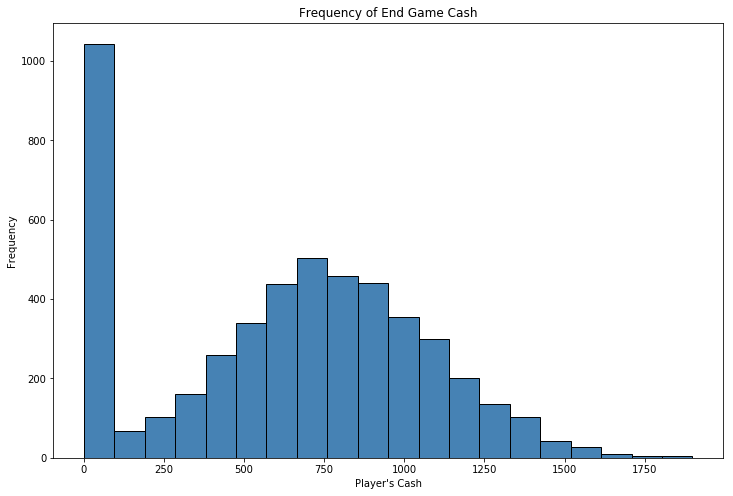

In [11]:
endCash = []
for i in range(5000):
    location = 0
    cash = 200
    for j in range(30):
        if cash!= 0:
            result = miniopoly_turn(location, cash)
            location = result[0]
            cash = result[1]
    endCash.append(result)
    
cashData = np.zeros(len(endCash))
for i in range(len(endCash)):
    cashData[i] = endCash[i][1]
    
fig,axs = plt.subplots(figsize=(12,8))

axs.hist(cashData,facecolor="steelblue",edgecolor="black", bins = 20)
axs.set_ylabel('Frequency')
axs.set_xlabel("Player's Cash")
axs.set_title('Frequency of End Game Cash')

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [12]:
games = 50000
endCash = []
zeros = 0
for i in range(games):
    location = 0
    cash = 200
    for j in range(30):
        if cash != 0:
            result = miniopoly_turn(location, cash)
            location = result[0]
            cash = result[1]
    endCash.append(result)

for i in range(len(endCash)):
    if endCash[i][1] == 0:
        zeros += 1

prob = zeros/games
print("Estimated probability of going bankrupt in the first 30 turns after {} games is {:f}.".format(games, prob))

Estimated probability of going bankrupt in the first 30 turns after 50000 games is 0.197380.


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [13]:
games = 5000
endCash = []
jResult = []
for i in range(games):
    location = 0
    cash = 200
    jail = 0
    for j in range(30):
        if cash != 0:
            result = miniopoly_turn(location, cash)
            if location == "Jail":
                jail += 1
            location = result[0]
            cash = result[1]
    if jail > 0:
        jResult = [result[0], result[1], True]
    else:
        jResult = [result[0], result[1], False]
    endCash.append(jResult)

JZeros = 0
J = 0
for i in range(len(endCash)):
    if endCash[i][1] == 0 and endCash [i][2] == True:
        JZeros += 1
    if endCash[i][2] == True:
        J += 1

prob = JZeros/J
print("Estimated probability of going bankrupt given the player went to jail in the first 30 turns after {} games is {:f}.".format(games, prob))

Estimated probability of going bankrupt given the player went to jail in the first 30 turns after 5000 games is 0.172757.


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [14]:
games = 5000
endCash = []
jResult = []
for i in range(games):
    location = 0
    cash = 200
    jail = 0
    for j in range(30):
        if cash != 0:
            result = miniopoly_turn(location, cash)
            if location == "Jail":
                jail += 1
            location = result[0]
            cash = result[1]
    if jail > 0:
        jResult = [result[0], result[1], True]
    else:
        jResult = [result[0], result[1], False]
    endCash.append(jResult)

J = 0
zeros = 0
for i in range(len(endCash)):
    if endCash[i][1] == 0:
        zeros += 1
    if endCash[i][1] == 0 and endCash[i][2] == True:
        J += 1

prob = J/zeros
print("Estimated probability of going bankrupt given they went to jail in the first 30 turns after {} games is {:f}.".format(games, prob))

Estimated probability of going bankrupt given they went to jail in the first 30 turns after 5000 games is 0.471899.


***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


$Die 1 = 1, 2, 3, 4, 5, 6$ <br \>
$Die 2 = 1, 2, 3, 4, 5 ,6$ <br \>
$6 \times 6 = 36$ possible combos <br \>

$(1,1),(1,2),(2,1),(2,2),(2,3),(3,2),(3,3),(3,4),(4,3),(4,4),(4,5),(5,4),(5,5),(5,6),(6,5),(6,6)$ <br \>
$16$ possible combos for $C$

$P(C) = \frac {16}{36} = \frac {4}{9} = 0.4\overline{44}$

**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [15]:
die = np.array([1,2,3,4,5,6])

num_rolls = 50000
rolls1 = np.random.choice(die, size=num_rolls)
rolls2 = np.random.choice(die, size=num_rolls)

same = np.sum(rolls1 == rolls2)/len(rolls1) + np.sum(rolls1+1 == rolls2)/len(rolls1) + np.sum(rolls1 == rolls2+1)/len(rolls1)

print("The estimated P(C) is", same, ".")

The estimated P(C) is 0.44688 .


**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

Estimated probability after 50000 rolls is 0.447


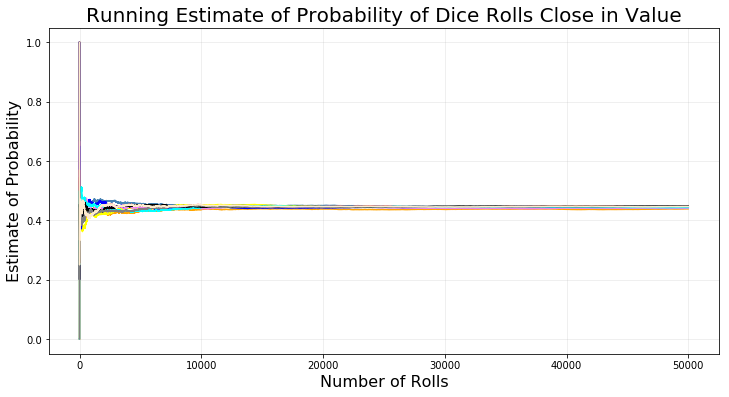

In [16]:
rolls3 = np.random.choice(die, size=num_rolls)
rolls4 = np.random.choice(die, size=num_rolls)
rolls5 = np.random.choice(die, size=num_rolls)
rolls6 = np.random.choice(die, size=num_rolls)
rolls7 = np.random.choice(die, size=num_rolls)
rolls8 = np.random.choice(die, size=num_rolls)
rolls9 = np.random.choice(die, size=num_rolls)
rolls10 = np.random.choice(die, size=num_rolls)

p = np.zeros(num_rolls)
o = np.zeros(num_rolls)
q = np.zeros(num_rolls)
r = np.zeros(num_rolls)
s = np.zeros(num_rolls)
t = np.zeros(num_rolls)
u = np.zeros(num_rolls)
v = np.zeros(num_rolls)
w = np.zeros(num_rolls)
x = np.zeros(num_rolls)

for ii in range(num_rolls):
    r1 = rolls1
    r2 = rolls2
    p[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    r1 = rolls3
    r2 = rolls4
    o[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    r1 = rolls5
    r2 = rolls6
    q[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    r1 = rolls7
    r2 = rolls8
    r[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    r1 = rolls9
    r2 = rolls10
    s[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    r1 = rolls1
    r2 = rolls10
    t[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    r1 = rolls2
    r2 = rolls9
    u[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    r1 = rolls3
    r2 = rolls8
    v[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    r1 = rolls4
    r2 = rolls7
    w[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    r1 = rolls5
    r2 = rolls6
    x[ii] = np.sum(r1[:ii+1] == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1]+1 == r2[:ii+1])/len(r1[:ii+1]) + np.sum(r1[:ii+1] == r2[:ii+1]+1)/len(r1[:ii+1])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(p, color="steelblue")
ax.plot(o, color="orange")
ax.plot(q, color="red")
ax.plot(r, color="yellow")
ax.plot(s, color="blue")
ax.plot(t, color="violet")
ax.plot(u, color="cyan")
ax.plot(v, color="black")
ax.plot(w, color="grey")
ax.plot(x, color="blanchedalmond")
ax.set_title("Running Estimate of Probability of Dice Rolls Close in Value", fontsize=20)
ax.set_xlabel("Number of Rolls", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

print("Estimated probability after {} rolls is {:.3f}".format(num_rolls, p[-1]))

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

The running estimated probability tends to stop changing so much from trial to trial and appears to eventually reach an accurate estimated probability as the number of trials increases.